# Read Data

In [1]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from collections import OrderedDict
import os


gold_labels = pd.read_json("evaluation/golds/EXIST2024_training_task4_gold_hard.json")
soft_labels = pd.read_json("evaluation/golds/EXIST2024_training_task4_gold_soft.json")

data = pd.read_json("EXIST2024_training.json", orient="index")

In [2]:
pd.read_json("/home/elural/EXIST-TFM/data/training/evaluation/golds/EXIST2024_training_task4_gold_soft.json").shape

(4044, 3)

## Add baselines to original data

In [2]:
TASK5_TO_CLASS = OrderedDict({
    "NO": 0,
    "DIRECT": 1,
    "JUDGEMENTAL": 2
})

TASK6_TO_CLASS = OrderedDict({
    "NO": 0,
    "IDEOLOGICAL-INEQUALITY": 1,
    "STEREOTYPING-DOMINANCE": 2,
    "OBJECTIFICATION" : 3,
    "SEXUAL-VIOLENCE": 4,
    "MISOGYNY-NON-SEXUAL-VIOLENCE": 5
})
def read_and_merge_files(directory, main_df):
    import re
    # Define the regex pattern
    pattern = re.compile(r'^EXIST2024_training_task([456])_gold_(hard|soft).json$')
    # Dictionary to store auxiliary DataFrames for each task and label
    aux_dfs = {4: {'hard': None, 'soft': None}, 5: {'hard': None, 'soft': None}, 6: {'hard': None, 'soft': None}}
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Check if the file name matches the pattern
        match = pattern.match(filename)
        if match:
            task = int(match.group(1))
            label = match.group(2)
            full_path = os.path.join(directory, filename)
            
            # Read the file into an auxiliary DataFrame
            aux_df = pd.read_json(full_path)
            
            # Rename columns
            aux_df = aux_df[["id", "value"]].rename(columns={"id": "id_EXIST", "value": f"task{task}_{label}"})
            aux_dfs[task][label] = aux_df
    
    # Merge auxiliary DataFrames with the main DataFrame in the specified order
    for task in sorted(aux_dfs.keys()):
        for label in ['hard', 'soft']:
            if aux_dfs[task][label] is not None:
                main_df = pd.merge(main_df, aux_dfs[task][label], on='id_EXIST', how='left')
    
    return main_df

clean_data = read_and_merge_files('./evaluation/golds', data)
#-100 is equal to ignore index of this class
clean_data["task4_hard"] = clean_data["task4_hard"].apply(lambda x: 1 if x == "YES" else 0 if x == "NO" else -100)
clean_data["task4_soft"] = clean_data["task4_soft"].apply(lambda row: [row["NO"], row["YES"]])
#Search whether the class is inside the dictionary or not. If it isn't, its a NaN, so we map to -100 to further ignore index
clean_data["task5_hard"] = clean_data["task5_hard"].apply(lambda row: TASK5_TO_CLASS.get(row, -100))
clean_data["task5_soft"] = clean_data["task5_soft"].apply(lambda row:[row[k] for k in TASK5_TO_CLASS.keys()])
#Check whether if the sample has annotations or not, if it hasn't it means its NaN, so we store -100 and we will handle the loss later with a mask
clean_data["task6_hard"] = clean_data["task6_hard"].apply(lambda row:[int(k in row) for k in TASK6_TO_CLASS.keys()] if row is not np.nan else -100)
clean_data["task6_soft"] = clean_data["task6_soft"].apply(lambda row:[round(row[k], 4) for k in TASK6_TO_CLASS.keys()])
#clean_data.to_json("EXIST2024_training_clean_2.json", orient="index")

data = clean_data


# Analysis of task 4

## Data analysis

# Task 4

In [3]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np


data = pd.read_json("EXIST2024_training.json", orient="index")

gold_labels = pd.read_json("evaluation/golds/EXIST2024_training_task4_gold_hard.json")
soft_labels = pd.read_json("evaluation/golds/EXIST2024_training_task4_gold_soft.json")


data = pd.merge(data, gold_labels[["id", "value"]].rename(columns={"id":"id_EXIST", "value":"task4_hard"}), on='id_EXIST', how='left')
data["task4_hard"] = data["task4_hard"].apply(lambda x: 1 if x == "YES" else 0 if x== "NO" else None)
#data = pd.merge(data, soft_labels[["id", "value"]].rename(columns={"id":"id_EXIST", "value":"task4_soft"}), on='id_EXIST', how='left')

data_es = data[data["lang"] == "es"]
data_en = data[data["lang"] == "en"]

soft_labels["YES"] = soft_labels["value"].apply(lambda x: round(x["YES"], 4))
soft_labels["NO"] = soft_labels["value"].apply(lambda x: round(x["NO"], 4))
data.head(5)

,id_EXIST,lang,text,meme,path_memes,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task4,labels_task5,labels_task6,split,task4_hard
0,110001,es,2+2=5 MITO Albert Einstein tenía bajo rendimie...,110001.jpeg,memes/110001.jpeg,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 18-22, 23-45]","[Hispano or Latino, Hispano or Latino, Hispano...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Argentina, Spain, Mexico, Mexico]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT]","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN-MEME_ES,1.0
1,110002,es,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,110002.jpeg,memes/110002.jpeg,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 18-22, 23-45]","[Hispano or Latino, Hispano or Latino, Hispano...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Argentina, Spain, Mexico, Mexico]","[YES, YES, YES, YES, YES, YES]","[DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, JUDGE...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN-MEME_ES,1.0
2,110003,es,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,110003.jpeg,memes/110003.jpeg,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 18-22, 23-45]","[Hispano or Latino, Hispano or Latino, Hispano...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Argentina, Spain, Mexico, Mexico]","[YES, YES, NO, NO, NO, NO]","[DIRECT, DIRECT, -, -, -, -]","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN-MEME_ES,0.0
3,110004,es,"Paises que ""apoyan"" los derechos de la mujer A...",110004.jpeg,memes/110004.jpeg,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 18-22, 23-45]","[Hispano or Latino, Hispano or Latino, Hispano...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Argentina, Spain, Mexico, Mexico]","[YES, YES, NO, NO, YES, NO]","[JUDGEMENTAL, JUDGEMENTAL, -, -, JUDGEMENTAL, -]","[[IDEOLOGICAL-INEQUALITY], [IDEOLOGICAL-INEQUA...",TRAIN-MEME_ES,NaN
4,110005,es,Ya verás como este 8 de marzo hay uno que te s...,110005.jpeg,memes/110005.jpeg,6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 18-22, 23-45]","[Hispano or Latino, Hispano or Latino, Hispano...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Argentina, Spain, Mexico, Mexico]","[NO, YES, NO, NO, YES, NO]","[-, JUDGEMENTAL, -, -, DIRECT, -]","[[-], [IDEOLOGICAL-INEQUALITY], [-], [-], [IDE...",TRAIN-MEME_ES,0.0


### Distribution over hard labels

In [4]:
print("All dataset distribution on hard labels:", gold_labels["value"].value_counts(normalize=True, dropna=True))
print("Spanish dataset distribution on hard labels:", data_es["task4_hard"].value_counts(normalize=True, dropna=True))
print("English dataset distribution on hard labels:", data_en["task4_hard"].value_counts(normalize=True, dropna=True))

All dataset distribution on hard labels: value
YES    0.595906
NO     0.404094
Name: proportion, dtype: float64
Spanish dataset distribution on hard labels: task4_hard
1.0    0.626752
0.0    0.373248
Name: proportion, dtype: float64
English dataset distribution on hard labels: task4_hard
1.0    0.564988
0.0    0.435012
Name: proportion, dtype: float64


### All dataset

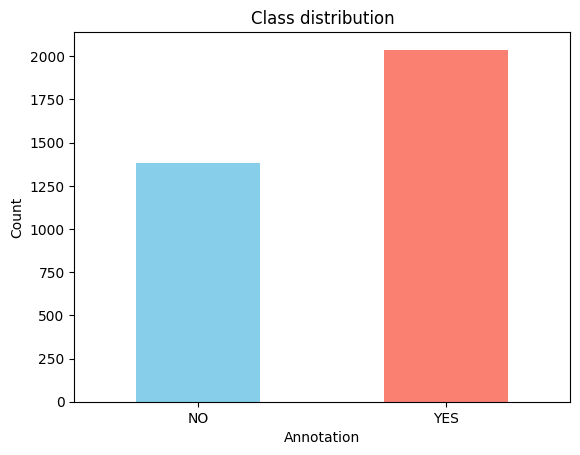

In [5]:
hard_labels_dist = gold_labels.groupby("value")["value"].count()
hard_labels_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class distribution')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Spanish only

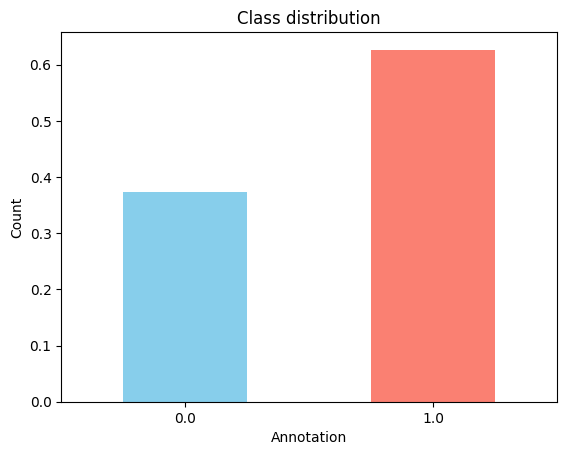

In [6]:
hard_labels_dist = data_es["task4_hard"].value_counts(normalize=True, ascending=True)
hard_labels_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class distribution')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

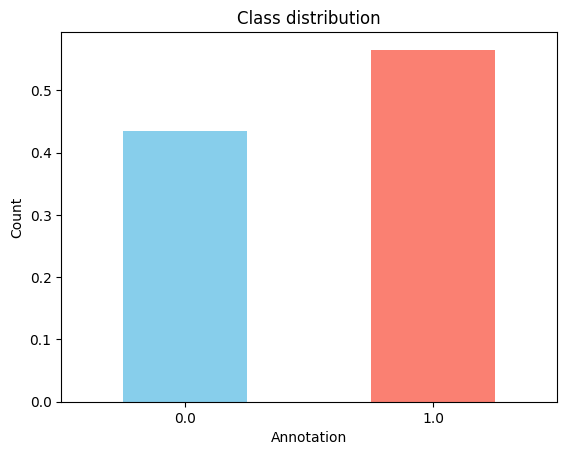

In [7]:
hard_labels_dist = data_en["task4_hard"].value_counts(normalize=True, ascending=True)
hard_labels_dist.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class distribution')
plt.xlabel('Annotation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Distribution over soft labels

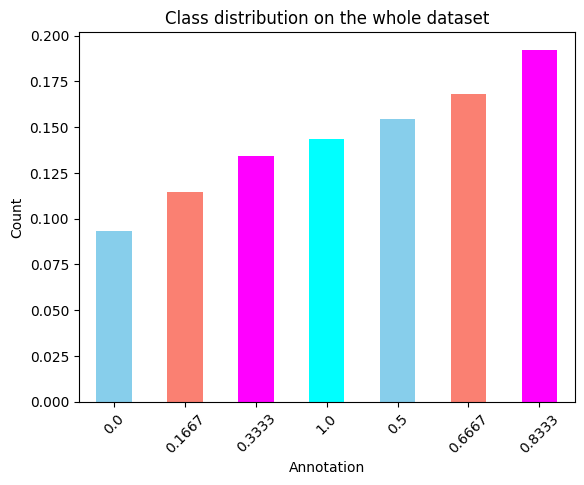

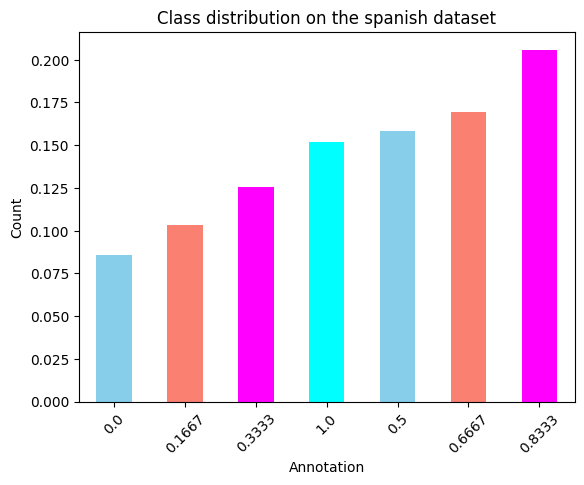

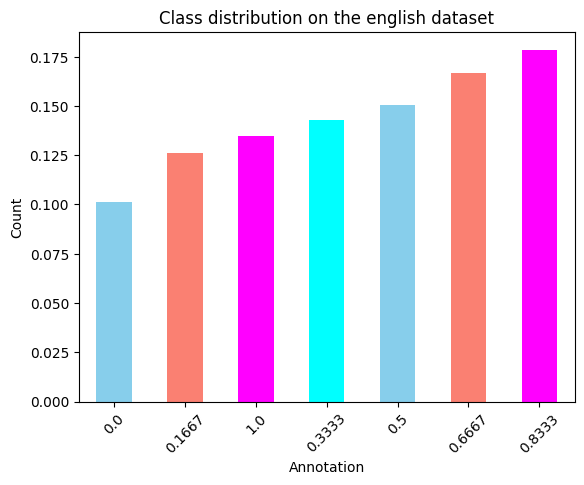

In [8]:
import matplotlib.pyplot as plt

def plot_soft_labels_distribution(soft_labels, title=None):
    soft_labels_dist = soft_labels["YES"].value_counts(normalize=True, ascending=True, sort=True)

    soft_labels_dist.plot(kind='bar', color=['skyblue', 'salmon', 'magenta', 'cyan'])
    plt.title(title if title else 'Class distribution by positive votes')
    plt.xlabel('Annotation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_soft_labels_distribution(soft_labels, "Class distribution on the whole dataset")
plot_soft_labels_distribution(soft_labels[soft_labels["id"].isin(data_es["id_EXIST"])], "Class distribution on the spanish dataset")
plot_soft_labels_distribution(soft_labels[soft_labels["id"].isin(data_en["id_EXIST"])], "Class distribution on the english dataset")

In [10]:
from sklearn.cluster import KMeans
soft_labels = pd.read_json("evaluation/golds/EXIST2024_training_task6_gold_soft.json")
def sort_dict(d):
    return dict(sorted(d.items()))

soft_labels['value'] = soft_labels['value'].apply(sort_dict)
print(soft_labels)
soft_labels_values = np.array([list(x[1]['value'].values()) for x in soft_labels.iterrows()])
kmeans = KMeans(n_clusters=2000, random_state=42).fit(soft_labels_values)
cluster_labels = kmeans.labels_

cluster_labels

      test_case      id                                              value
0     EXIST2024  110001  {'IDEOLOGICAL-INEQUALITY': 1.0, 'MISOGYNY-NON-...
1     EXIST2024  110002  {'IDEOLOGICAL-INEQUALITY': 0.6666666666666661,...
2     EXIST2024  110003  {'IDEOLOGICAL-INEQUALITY': 0.0, 'MISOGYNY-NON-...
3     EXIST2024  110004  {'IDEOLOGICAL-INEQUALITY': 0.33333333333333304...
4     EXIST2024  110005  {'IDEOLOGICAL-INEQUALITY': 0.33333333333333304...
...         ...     ...                                                ...
4039  EXIST2024  212006  {'IDEOLOGICAL-INEQUALITY': 0.2, 'MISOGYNY-NON-...
4040  EXIST2024  212007  {'IDEOLOGICAL-INEQUALITY': 0.0, 'MISOGYNY-NON-...
4041  EXIST2024  212008  {'IDEOLOGICAL-INEQUALITY': 0.16666666666666602...
4042  EXIST2024  212009  {'IDEOLOGICAL-INEQUALITY': 0.0, 'MISOGYNY-NON-...
4043  EXIST2024  212010  {'IDEOLOGICAL-INEQUALITY': 0.0, 'MISOGYNY-NON-...

[4044 rows x 3 columns]


/home/elural/.conda/envs/exist-tfm/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1457) found smaller than n_clusters (2000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


array([ 744,  860,  867, ..., 1004,   38, 1232], dtype=int32)

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(soft_labels_values, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(soft_labels_values, kmeans.labels_)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_avg)

Silhouette Score: 0.7685459932447488
Davies-Bouldin Index: 5.2616412369575455e-08


In [12]:
import numpy as np

def check_distribution(labels):
    return np.mean(labels, axis=0)

original_distribution = check_distribution(soft_labels_values)

# Calculate distribution within each cluster
cluster_distributions = []
for cluster in np.unique(kmeans.labels_):
    cluster_labels = soft_labels_values[kmeans.labels_ == cluster]
    cluster_distribution = check_distribution(cluster_labels)
    cluster_distributions.append(cluster_distribution)

print("Original Distribution:", original_distribution)
for i, dist in enumerate(cluster_distributions):
    print(f"Cluster {i} Distribution:", dist)


Original Distribution: [0.17334735 0.08567013 0.44439499 0.18963897 0.09272997 0.20023079]
Cluster 0 Distribution: [0.16666667 0.16666667 0.66666667 0.16666667 0.         0.16666667]
Cluster 1 Distribution: [0.         0.16666667 0.33333333 0.5        0.         0.16666667]
Cluster 2 Distribution: [0.16666667 0.16666667 0.16666667 0.16666667 0.         0.33333333]
Cluster 3 Distribution: [0. 0. 1. 0. 0. 0.]
Cluster 4 Distribution: [0.83333333 0.         0.16666667 0.         0.         0.        ]
Cluster 5 Distribution: [0.         0.16666667 0.         0.33333333 1.         0.        ]
Cluster 6 Distribution: [0.16666667 0.         0.16666667 0.83333333 0.16666667 0.        ]
Cluster 7 Distribution: [0.5        0.16666667 0.16666667 0.         0.         0.83333333]
Cluster 8 Distribution: [0.         0.         0.16666667 0.33333333 0.5        0.        ]
Cluster 9 Distribution: [0.33333333 0.         0.5        0.         0.         0.16666667]
Cluster 10 Distribution: [0.         

### Distribution over gender

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_votes(data, title):
    # Convert "YES" to 1 and "NO" to 0
    lst = lambda lst: [1 if x == "YES" else 0 for x in lst]

    # Extract the first three elements (female votes)
    females = [lst(y)[:3] for y in data["labels_task4"].tolist()]

    # Calculate the probability of a "YES" vote for females
    probs_female = np.round(np.sum(females, axis=1) / 3, 4)

    # Extract the last three elements (male votes)
    males = [lst(y)[3:] for y in data["labels_task4"].tolist()]

    # Calculate the probability of a "YES" vote for males
    probs_male = np.round(np.sum(males, axis=1) / 3, 4)

    # Calculate unique values from both female and male probabilities
    unique_values_females, f_counts = np.unique(probs_female, return_counts=True)
    unique_values_males, m_counts = np.unique(probs_male, return_counts=True)

    # Plotting the probability mass function for females
    plt.bar(unique_values_females, np.histogram(probs_female, bins=len(unique_values_males), density=True)[0] / len(f_counts), width=0.05, color='green', label='Female')

    # Plotting the probability mass function for males
    plt.bar(unique_values_males + 0.1, np.histogram(probs_male, bins=len(unique_values_females), density=True)[0] / len(m_counts), width=0.05, color='red', label='Male')

    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

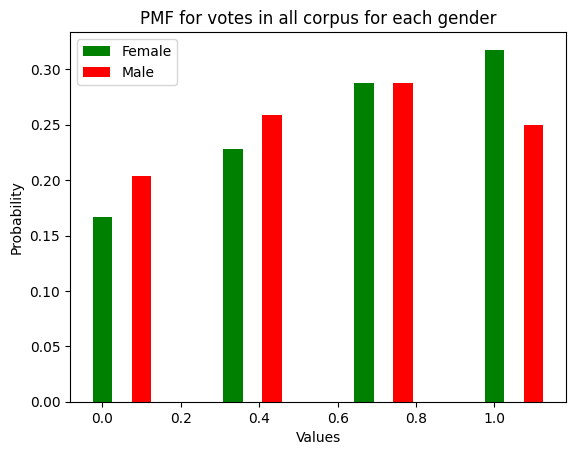

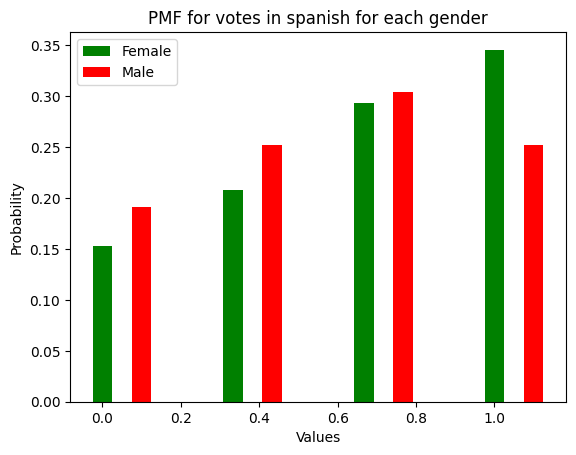

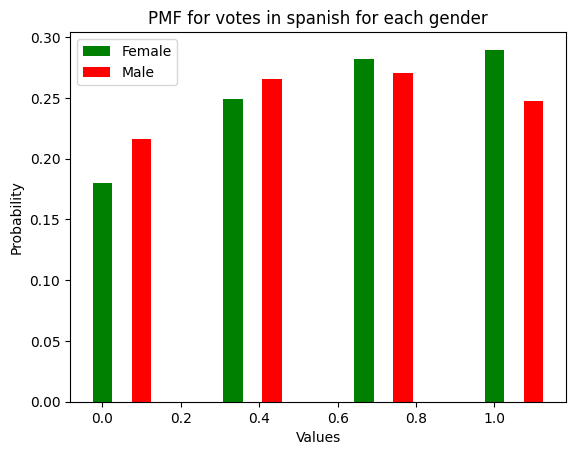

In [45]:
plot_votes(data, "PMF for votes in all corpus for each gender")
plot_votes(data_es, "PMF for votes in spanish for each gender")
plot_votes(data_en, "PMF for votes in spanish for each gender")

### Distribution over age

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_age_groups_probabilities(data, title):
    # Define age groups mapping
    age_groups = {'18-22': 0, '23-45': 1, '46+': 2}
    
    # Lambda function to convert "YES" to 1 and other values to 0
    lst = lambda y: 1 if y == "YES" else 0 
    
    # Convert age annotations to numerical values
    annotators_ages = np.array([age_groups.get(y) for x in data['age_annotators'] for y in x])
    
    # Convert labels to binary votes
    votes = np.array([lst(y) for x in data["labels_task4"].tolist() for y in x])
    
    # Create masks for each age group
    mask_jovenes = annotators_ages == 0
    mask_media = annotators_ages == 1
    mask_viejos = annotators_ages == 2
    
    # Calculate counts of "NO" and "YES" for each age group
    votos_jovenes = [len(votes[mask_jovenes]) - sum(votes[mask_jovenes]), sum(votes[mask_jovenes])]
    votos_media = [len(votes[mask_media]) - sum(votes[mask_media]), sum(votes[mask_media])]
    votos_viejos = [len(votes[mask_viejos]) - sum(votes[mask_viejos]), sum(votes[mask_viejos])]
    
    # Plotting the probability mass function
    plt.bar([0, 1], votos_jovenes, width=0.05, label="J")  # Dividing counts by total elements for normalization
    plt.bar([0.05, 1.05], votos_media, width=0.05, label="M")
    plt.bar([0.1, 1.1], votos_viejos, width=0.05, label="V")
    plt.legend()
    plt.title(title)
    plt.xlabel('Votes')
    plt.ylabel('Count')
    plt.show()

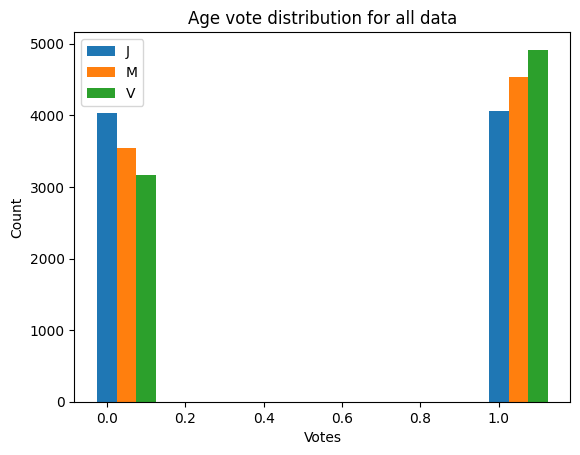

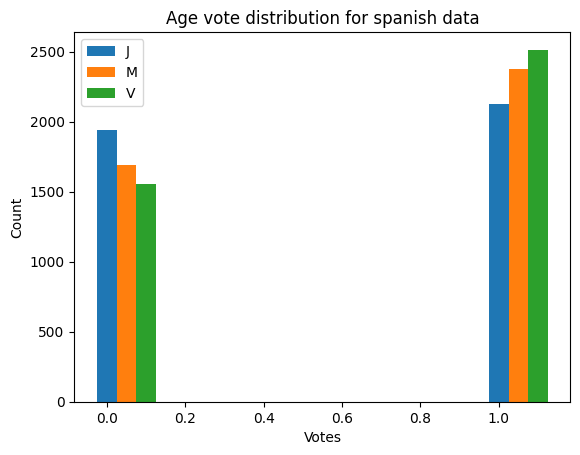

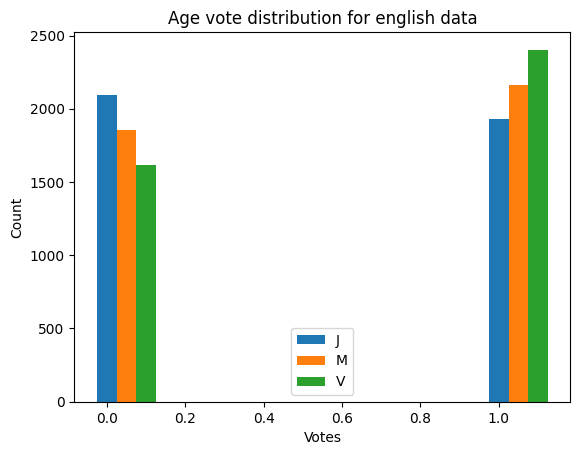

In [47]:
plot_age_groups_probabilities(data, "Age vote distribution for all data")
plot_age_groups_probabilities(data_es, "Age vote distribution for spanish data")
plot_age_groups_probabilities(data_en, "Age vote distribution for english data")

### Distribution over study levels

In [48]:
def plot_votes_by_study(data, title=None):
    study_levels = {'High school degree or equivalent': 0, 'Bachelor’s degree': 1, 'Doctorate': 2, 'Master’s degree': 3, 'Less than high school diploma': 4, 'other': 5}
    id2_study = {0: 'High school degree or equivalent', 1: 'Bachelor’s degree', 2: 'Doctorate', 3: 'Master’s degree', 4: 'Less than high school diploma', 5: 'other'}

    lst = lambda y: 1 if y == "YES" else 0

    annotators_studies = np.array([study_levels.get(y, None) for x in data['study_levels_annotators'] for y in x])
    votes = np.array([lst(y) for x in data["labels_task4"].tolist() for y in x])
    ages = study_levels.values()

    votes_by_each_study = {}

    offset = 0.05
    for age in ages:
        idx_by_study = annotators_studies == age

        votes_by_each_study[age] = (len(votes[idx_by_study]) - np.sum(votes[idx_by_study])) / len(votes[idx_by_study]), np.sum(votes[idx_by_study]) / len(votes[idx_by_study])

        plt.bar([0 + offset, 1 + offset], votes_by_each_study[age], width=0.05, label=id2_study[age])
        offset += 0.05

    plt.legend(fontsize="small", loc="center")
    
    if title:
        plt.title(title)
    
    plt.show()

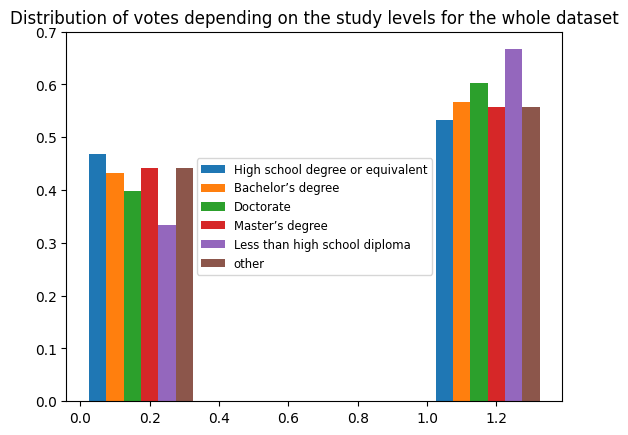

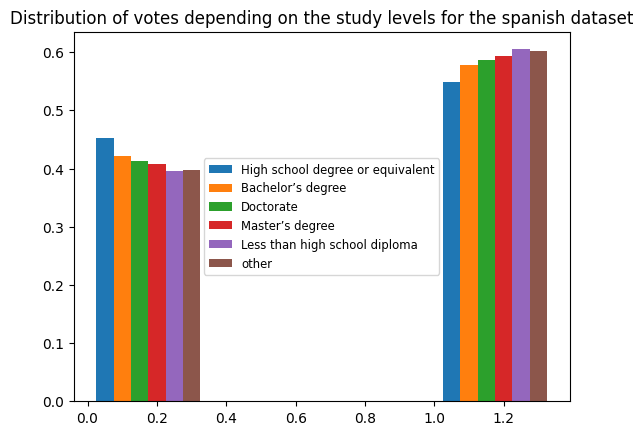

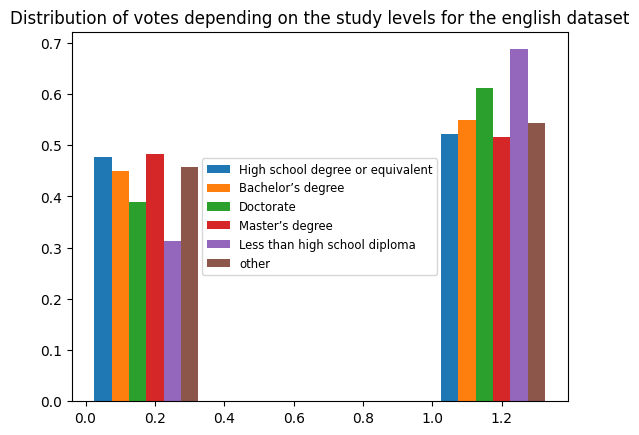

In [49]:
plot_votes_by_study(data, title="Distribution of votes depending on the study levels for the whole dataset")
plot_votes_by_study(data_es, title="Distribution of votes depending on the study levels for the spanish dataset")
plot_votes_by_study(data_en, title="Distribution of votes depending on the study levels for the english dataset")

### Distribution over ethnicities

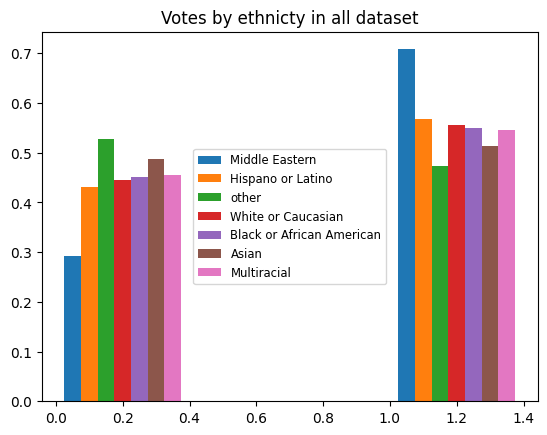

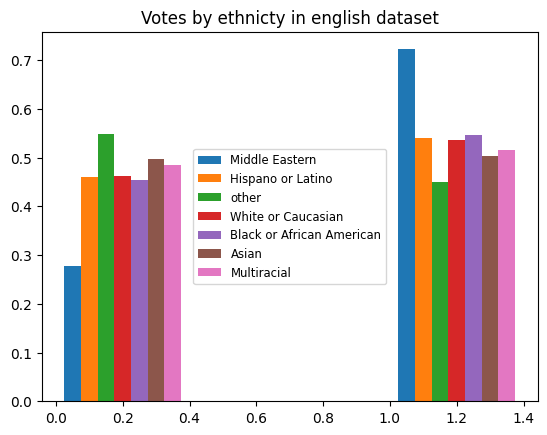

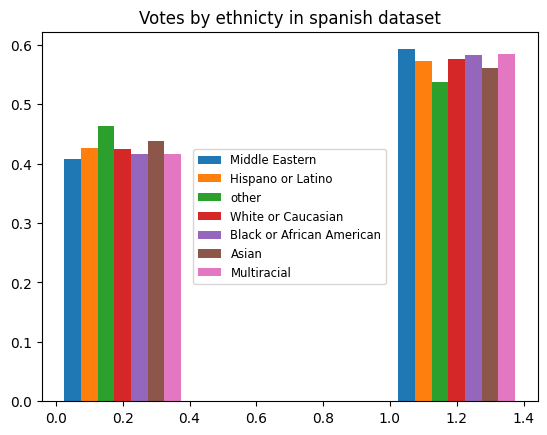

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def plot_votes_by_ethnicity(data, title=None):
    etniasid = {'Middle Eastern': 0, 'Hispano or Latino': 1, 'other': 2, 'White or Caucasian': 3, 'Black or African American': 4, 'Asian': 5, 'Multiracial': 6}
    id2etinas = {0: 'Middle Eastern', 1: 'Hispano or Latino', 2: 'other', 3: 'White or Caucasian', 4: 'Black or African American', 5: 'Asian', 6: 'Multiracial'}

    lst = lambda y: 1 if y == "YES" else 0

    annotators_etnias = np.array([etniasid.get(y, None) for x in data['ethnicities_annotators'] for y in x])
    votes = np.array([lst(y) for x in data["labels_task4"].tolist() for y in x])
    etnias = etniasid.values()

    votes_by_each_etnia = {}
    offset = 0.05

    for etnia in etnias:
        idx_by_etnia = annotators_etnias == etnia
        votes_by_each_etnia[etnia] = ((len(votes[idx_by_etnia]) - np.sum(votes[idx_by_etnia])) / len(votes[idx_by_etnia]), np.sum(votes[idx_by_etnia]) / len(votes[idx_by_etnia]))

        plt.bar([0 + offset, 1 + offset], votes_by_each_etnia[etnia], width=0.05, label=id2etinas[etnia])
        offset += 0.05

    plt.legend(fontsize="small", loc="center")

    if title:
        plt.title(title)

    plt.show()

plot_votes_by_ethnicity(data, "Votes by ethnicty in all dataset")
plot_votes_by_ethnicity(data_en, "Votes by ethnicty in english dataset")
plot_votes_by_ethnicity(data_es, "Votes by ethnicty in spanish dataset")

## Test with simpler models

In [5]:
data_es

[0        True
 1        True
 2        True
 3        True
 4        True
         ...  
 4039    False
 4040    False
 4041    False
 4042    False
 4043    False
 Name: lang, Length: 4044, dtype: bool]

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
data_es = data[data["lang"] == "es"]
data_en = data[data["lang"] == "en"]
all_data = data_es[["text", "task4_hard"]]
#all_data = data_en[["text", "task4_hard"]]
all_data = all_data.dropna(subset="task4_hard")

all_data_neg = all_data[all_data["task4_hard"] == 0.0]
all_data_pos = all_data[all_data["task4_hard"] == 1.0].sample(frac=1,random_state=42)#

all_data_subsample = pd.concat([all_data_pos, all_data_neg])
text, target = all_data_subsample["text"].values, all_data_subsample["task4_hard"].values
all_data_subsample.shape, all_data.shape

((1712, 2), (2034, 2))

In [8]:
nlp = spacy.load('es_core_news_sm')
#nlp = spacy.load("en_core_web_sm")
def preprocess(text, nlp):
    import re
    import demoji
    text = text.lower()

    def remove_url(text):
        url_pattern = r'\b(?:https?://|www\.)?[a-zA-Z0-9.-]+\.[a-zA-Z]{2,6}\b(?:/[^\s]*)?'
        return re.sub(url_pattern, "", text)

    def remove_numbers(text):
        num_pattern = r'[0-9]+'
        return re.sub(num_pattern,"", text)
    
    def remove_emojis(text):
        return demoji.replace(text)
    
    def remove_punct_symbols(text):
        pattern = r'[^\w\s]'
        # Use re.sub() to replace these characters with an empty string
        return re.sub(pattern, '', text)

    def remove_twitter_handles(text):
        # Define the regex pattern to match Twitter handles
        pattern = r'@\w+'
        # Use re.sub() to replace these handles with an empty string
        cleaned_text = re.sub(pattern, '', text)
        return cleaned_text
    
    def remove_undesired_tokens_from_spacy_doc(token):
        return token.is_stop or token.is_punct or token.is_digit or token.like_email or token.is_stop or not token.is_alpha 

    text = remove_url(text)
    text = remove_twitter_handles(text)
    text = remove_numbers(text)
    text = remove_emojis(text)
    
    text = remove_punct_symbols(text)
    
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc if not remove_undesired_tokens_from_spacy_doc(token) and token.lemma_ not in ["memegenerator"]])
    return text


In [9]:
vectorizer = TfidfVectorizer(strip_accents="ascii", ngram_range=(1, 1), min_df=3)

text_preprocessed = [preprocess(t, nlp) for t in text]
tfidif_matrix = vectorizer.fit_transform(text_preprocessed)

In [10]:
# Fit and transform the corpus
X = vectorizer.fit_transform(text_preprocessed)

# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense format
dense_matrix = X.todense()
# Sum the TF-IDF scores for each term across all documents
term_sums = np.array(dense_matrix.sum(axis=0)).flatten()

# Create a DataFrame to hold terms and their summed TF-IDF scores
term_df = pd.DataFrame({'term': feature_names, 'tfidf_sum': term_sums})

# Sort the DataFrame by TF-IDF sum in descending order
term_df = term_df.sort_values(by='tfidf_sum', ascending=False)
term_df.head(50)

,term,tfidf_sum
730,mujer,90.304436
522,hombre,55.028610
334,el,31.150936
912,querer,25.745692
492,gustar,24.210150
1130,ver,24.055996
48,amor,19.158050
431,feminista,18.840984
1063,tener,17.510265
469,genero,16.841180


In [11]:
train_text, test_text, train_targets, test_targets = train_test_split(text_preprocessed, target, test_size=0.2, stratify=target, random_state=42, shuffle=True)

train_matrix = vectorizer.transform(train_text)
test_matrix = vectorizer.transform(test_text)

In [12]:
from sklearn.metrics import f1_score
clf = LogisticRegression(random_state=42).fit(train_matrix, train_targets)

preds = clf.predict(test_matrix)
f1_score(test_targets, preds, average="macro")

0.563153271848924

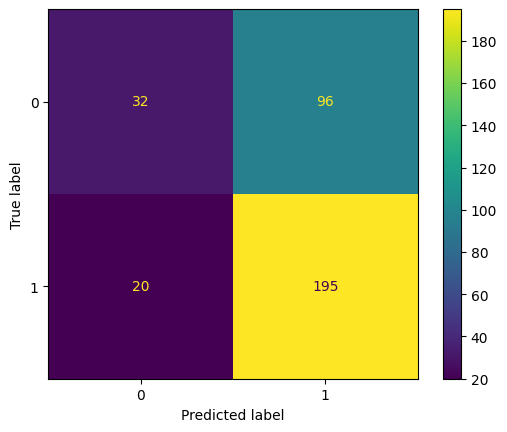

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_targets, preds)

In [14]:
idx = np.argsort(clf.coef_[0])[::-1]

idx_to_word = {
    v: k for k,v in vectorizer.vocabulary_.items()
}

for i in idx:
    print(idx_to_word[i], " ", clf.coef_[0][i])


mujer   2.656252954381639
puta   1.7178300182944977
hombre   1.6995674834045973
teta   1.5094974704840889
rubio   1.3441860835023987
acoso   1.3203182573934449
escote   1.3173608057618809
minifalda   1.273287637615248
feminista   1.219325258935346
violar   1.1028566793014807
querer   1.0731986476466544
patriarcado   1.0643650687183697
saber   1.060542617012813
zorra   1.0404887674148542
acosar   0.9538409527358199
boca   0.944727097407681
poner   0.9273827027735563
rubia   0.85023549668465
marzo   0.837517384182071
ropa   0.8165616590591736
manana   0.8078051147283912
feminismo   0.7587791367427731
guarra   0.7546763480359758
varon   0.7434808627617484
recreo   0.7355376339077551
pelo   0.7314313534726202
cocina   0.7236588543315728
coche   0.7185999717033715
extrano   0.7110721141035167
peligroso   0.7107773248623612
perra   0.7076204959592964
disfrutar   0.7006813221538267
novia   0.6824089941974146
feminazi   0.6743696541237079
sentir   0.6629048121607848
decir   0.6538126897808896


In [17]:
top_positive_terms = np.array(feature_names)[clf.coef_[0] > 0]

# Filtrar las muestras de la clase negativa
negative_samples = data_es[data_es['task4_hard'] == 0]

# Transformar el texto de las muestras negativas usando TF-IDF
X_negative = vectorizer.transform(negative_samples['text'])

# Contar la aparición de los términos en las muestras negativas
term_counts_in_negative_samples = (X_negative > 0).sum(axis=0).A1

# Crear un DataFrame con los resultados
term_counts_df = pd.DataFrame({
    'term': feature_names,
    'count_in_negative_samples': term_counts_in_negative_samples
})

# Filtrar solo los términos que más contribuyen a la clase positiva
positive_terms_counts_df = term_counts_df[term_counts_df['term'].isin(top_positive_terms)]

In [22]:
for idx, row in positive_terms_counts_df.sort_values(by='count_in_negative_samples', ascending=False).iterrows():
    print(row['term'], row['count_in_negative_samples'])

el 185
com 91
una 89
mujer 40
hombre 25
memes 22
estas 19
hacer 13
casa 12
sexual 11
madre 9
ir 8
quieres 8
estar 8
machista 8
amiga 7
senorita 7
trabajo 7
va 6
cara 6
gorda 6
chica 6
ay 6
decir 6
deberia 5
gracias 5
follar 5
humor 5
mil 5
morir 5
papa 5
novia 5
abusadora 5
feminista 5
fea 5
dar 5
poder 5
compartir 4
for 4
dios 4
real 4
tipo 4
igual 4
poner 4
hermano 4
ma 4
culo 4
zorra 4
senora 4
pasar 4
usar 4
xd 4
soltera 4
mr 3
social 3
hija 3
dolor 3
cocinar 3
facebook 3
mx 3
equidad 3
caso 3
forma 3
saber 3
libre 3
bonito 3
violacion 3
jun 3
violar 3
dinero 3
on 3
voz 3
medio 3
pase 3
bano 3
cocina 3
pa 3
ex 3
perfil 3
corazon 3
calle 3
fb 3
acoso 3
obtener 2
numero 2
dragon 2
ee 2
discurso 2
paso 2
perfecto 2
pareja 2
par 2
paliza 2
pecho 2
cuidadora 2
psoe 2
pene 2
grupo 2
guapo 2
abusar 2
soltero 2
simplemente 2
be 2
beso 2
callate 2
feo 2
lenguaje 2
luchar 2
luis 2
hospital 2
humo 2
izquierda 2
in 2
inclusivo 2
llevar 2
oo 2
of 2
oh 2
nombre 2
esposa 2
facil 2
espana 2
minuto

# Add image caption to memes

In [14]:
import torch
import pandas as pd
from transformers import pipeline, BitsAndBytesConfig
from datasets import Dataset
from transformers.pipelines.pt_utils import KeyDataset
from tqdm import tqdm
#1. Create Quant settings
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)
#2. Set model id and prompt
model_id = "llava-hf/llava-1.5-7b-hf"
prompt = "USER: <image>\nDescribe the content of the meme, but ignore the text caption of the meme. Provide a clear,concise and short answer.\nASSISTANT:"
max_new_tokens = 64
num_beams = 3
#3. Read dataframe
df = pd.read_json("EXIST2024_training_description_v2.json", orient="index")[:32]
df["file_name"] = df["path_memes"]
dataset = Dataset.from_pandas(pd.DataFrame(df["file_name"]))

#4. Set pipeline
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})
outputs = pipe(KeyDataset(dataset, "file_name"), prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens, "num_beams": num_beams}, batch_size=4)

#5.Store generated text
df["image_description"] = [o["generated_text"] for o in outputs]
df.to_json("test", orient="index")

In [6]:
with open("clean_generated_descriptions.txt") as f:
    descriptions = [line.strip() for line in f.readlines()]

clean_data["image_descriptions"] = descriptions

In [9]:
clean_data.to_json("EXIST2024_training_clean_descriptions_2.json", orient="index")

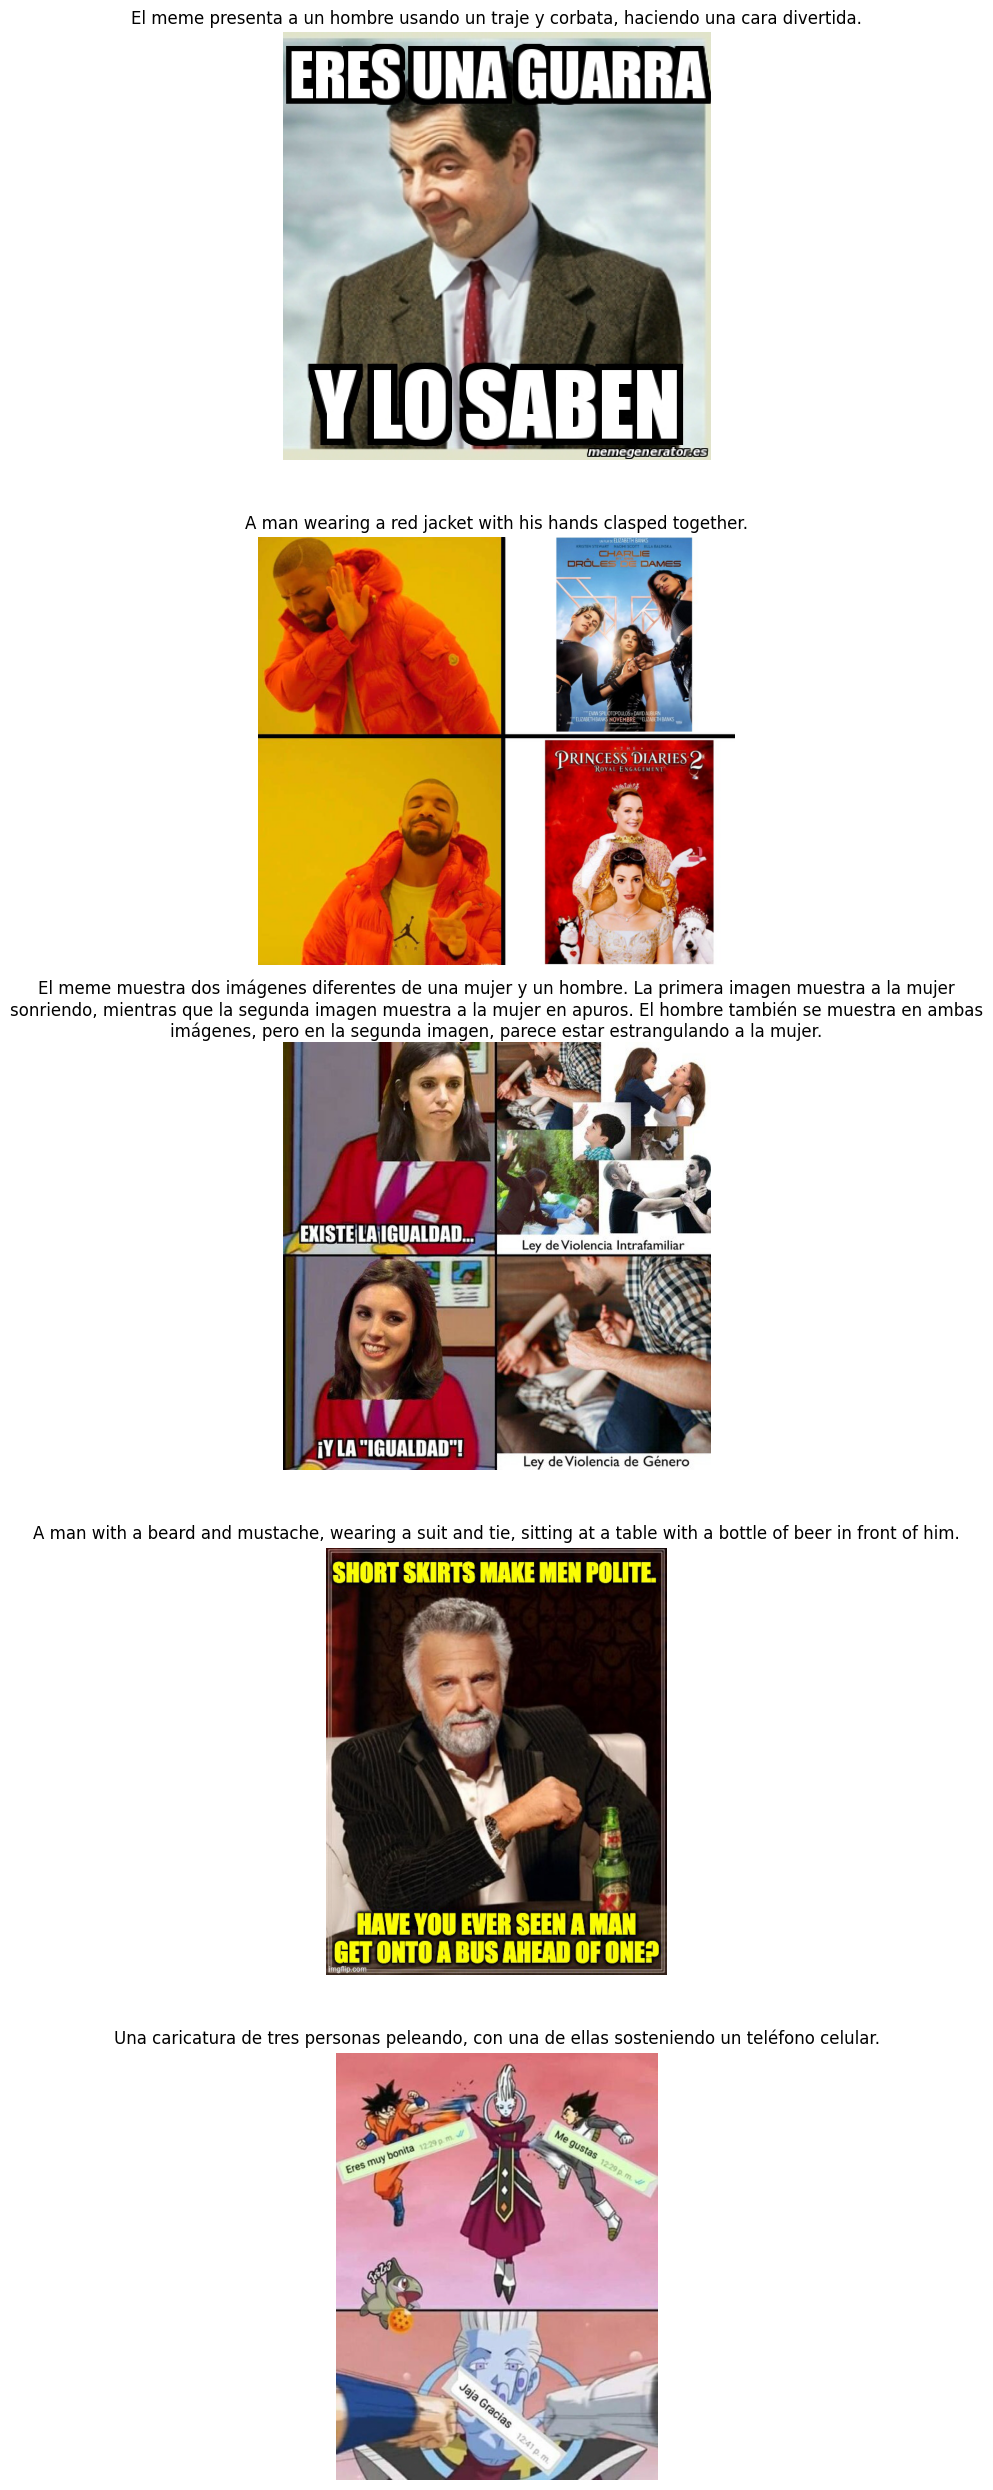

In [22]:
data = pd.read_json("EXIST2024_training_clean_descriptions_translated.json", orient="index")

import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

def display_random_images(df, num_images=None):
    # If num_images is not specified, choose a random number between 1 and the length of the dataframe
    if num_images is None:
        num_images = random.randint(1, len(df))
    else:
        num_images = min(num_images, len(df))  # Ensure we don't try to display more images than we have
    
    # Randomly select rows from the dataframe
    selected_rows = df.sample(n=num_images)
    
    # Create a figure with subplots stacked in a column
    fig, axes = plt.subplots(num_images, 1, figsize=(10, 5*num_images))
    
    # If only one image is selected, axes will not be an array, so we convert it to a single-element array
    if num_images == 1:
        axes = [axes]
    
    for idx, (_, row) in enumerate(selected_rows.iterrows()):
        # Load and display the image
        img = Image.open(row['path_memes'])
        axes[idx].imshow(np.array(img))
        axes[idx].axis('off')
        
        # Add the description as a title
        axes[idx].set_title(row['image_descriptions'], wrap=True)
    
    plt.tight_layout()
    plt.show()

display_random_images(data, 5)